# 01. 텐서(Tensor)

### 텐서란?

넘파이 라이브로리의  ndarray 클래스와 유사한 형태로 배열이나 행렬과 유사한 자료형

텐서를 사용하여 모델의 입출력 뿐만 아니라 모델의 매개변수를 인코딩하고 GPU를 활용해 연산을 과속화할 수 있다



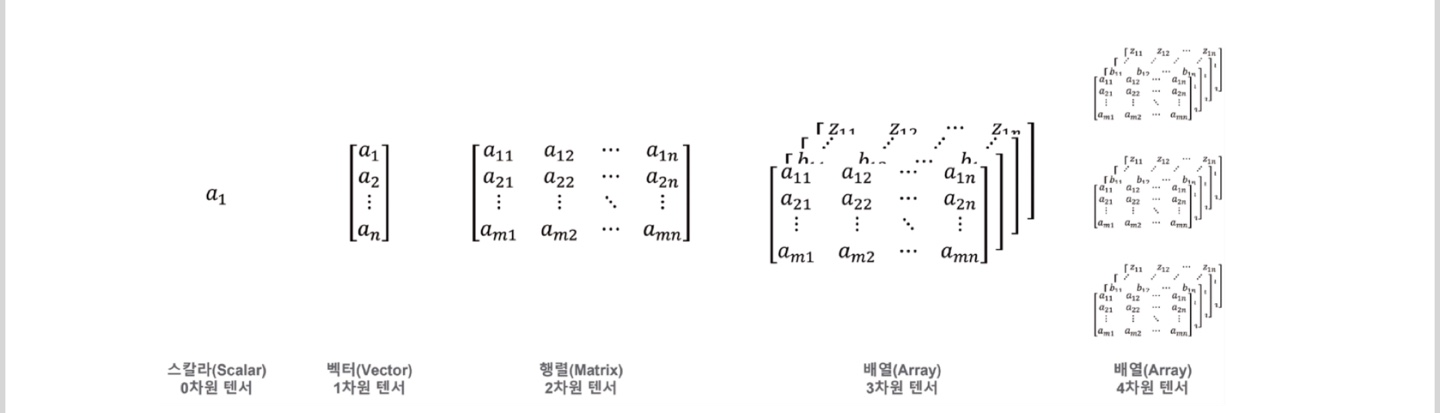

스칼라:  0차원 텐서라고도 부르며 모든 값의 기본 형태로 볼 수 있으며 차원은 없다

벡터 : [1,2,3]과 같은 형태로 파이썬에서 많이 사용하는 1차원 리스트와 비슷한 형태

행렬 : [[1,2,3],[4,5,6]]과 같은 형태로 회색조 이미지를 표현하고 벡터값들을 하나로 묶은 형태로 간주할 수 있으며 (N,M)으로 표현

배열 :  3차원이상의 배열을 모두 지칭하며 구별하기 위해 N차원 배열 또는 N차원 형태로 표현하고 이미지를 표현하기에 가장 적합한 형태이며 행렬을 세개 이상 겹쳐놓은 구조로 볼 수 있다



### 텐서 생성

torch.tensor() : 입력된 데이터를 복사해 텐서로 변환하는 함수이며 데이터를 복사하기 때문에 값이 무조건 존재해야 하고 입력된 데이터 형식에 가장 적합한 텐서 자료형으로 변환

torch.Tensor() : 텐서의 기본형으로 텐서 인스턴스를 생성하는 클래스이며 인스턴스를 생성하기 때문에 값을 입력하지 않는 경우 비어있는 텐서를 생성하며 가장 권장됨

Torch.tensor() : 비어 있는 구조로 생성되지 않고 자동으로 자료형을 할당하기 때문에 의도치 않은 자료형으로 변경될 수 있으므로 사용에 주의해야 함

In [1]:
import torch

print(torch.tensor([1, 2, 3]))
print(torch.Tensor([[1, 2, 3], [4, 5, 6]]))
print(torch.LongTensor([1, 2, 3]))
print(torch.FloatTensor([1, 2, 3]))

tensor([1, 2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([1, 2, 3])
tensor([1., 2., 3.])


torch.Tensor()는 입력된 형식이 int형이지만 float형식으로 생성되었는데 이는 기본형이 float이기 때문에 소숫점 형태로 반환된 것이다

### 텐서 속성

텐서 속성은 크게 형태(shape), 자료형(dtype), 장치(device)가 존재한다

In [2]:
import torch


tensor = torch.rand(1, 2)
print(tensor)
print(tensor.shape)
print(tensor.dtype)
print(tensor.device)

tensor([[1.5855e-05, 9.8196e-01]])
torch.Size([1, 2])
torch.float32
cpu


torch.rand()는 0과 1 사이의 무작위 숫자를 균등 분포로 생성

### 차원 변환

가장 많이 사용되는 메서드 중 하나로 머신러닝 연산과정이나 입출력 변환 등에 많이 활용

In [3]:
import torch

tensor = torch.rand(1, 2)
print(tensor)
print(tensor.shape)

tensor = tensor.reshape(2, 1)
print(tensor)
print(tensor.shape)

tensor([[0.1615, 0.6123]])
torch.Size([1, 2])
tensor([[0.1615],
        [0.6123]])
torch.Size([2, 1])


reshape 메서드를 활용하여 할 수 있다

### 자료형 설정

In [6]:
import torch


tensor = torch.rand((3, 3), dtype=torch.float)
print(tensor)

tensor([[0.1135, 0.4318, 0.4103],
        [0.3607, 0.9145, 0.5353],
        [0.5733, 0.6492, 0.6344]])


torch.float이 아닌 float을 사용해도 오류없이 작동 되지만 torch.float은 32비트 부동 소수점 형식, float은 64비트 부동 소수점을 갖는다

### 장치 설정

장치 설정을 정확하게 할당하지 않으면 오류가 발생하거나 CPU로 연산되어 많은 시간이 소모된다

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
cpu = torch.FloatTensor([1, 2, 3])
gpu = torch.cuda.FloatTensor([1, 2, 3])
tensor = torch.rand((1, 1), device=device)
print(device)
print(cpu)
print(gpu)
print(tensor)

C:\Users\yjpak\AppData\Local\Temp\ipykernel_21244\1208196125.py:3: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at ..\torch\csrc\tensor\python_tensor.cpp:80.)
  gpu = torch.cuda.FloatTensor([1, 2, 3])


cuda
tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')
tensor([[0.5144]], device='cuda:0')


CUDA를 설치하였기 때문에  정상 작동 된다

In [ ]:
# 맥의 경우

# import torch


# device = "mps" if torch.backends.mps.is_available() and torch.backends.mps.is_built() else "cpu"
# cpu = torch.FloatTensor([1, 2, 3])
# mps = torch.rand((1, 1), device=device)
# print(device)
# print(mps)

### 장치 변환

CPU 장치를 사용하는 텐서와 GPU 장치를 사용하는 텐서는 상호 간 연산 불가

CPU 장치를 사용하는 텐서와 넘파이 배열 간 연산은 가능하지만 GPU 장치를 사용하는 텐서와 넘파이 배열 간 연산은 불가능하다

In [9]:
cpu = torch.FloatTensor([1, 2, 3])
gpu = cpu.cuda()
gpu2cpu = gpu.cpu()
cpu2gpu = cpu.to("cuda")

print(cpu)
print(gpu)
print(gpu2cpu)
print(cpu2gpu)

tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')
tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')


### 넘파이 배열의 텐서 변환

넘파이나 다른 라이브러리의 데이터를 파이토치에 활용하려면 텐서형식으로 변환해야 한다

In [10]:
import torch
import numpy as np


ndarray = np.array([1, 2, 3], dtype=np.uint8)
print(torch.tensor(ndarray))
print(torch.Tensor(ndarray))
print(torch.from_numpy(ndarray))


tensor([1, 2, 3], dtype=torch.uint8)
tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.uint8)


텐서는 넘파이와 매우 친화적인 구조를 가지므로 넘파이 데이터를 별다른 전환없이 적용 가능

### 텐서의 넘파이 배열 전환

추론된 결과를 후처리하거나 결괏값을 활용할 때 주로 사용

In [11]:
import torch

tensor = torch.cuda.FloatTensor([1, 2, 3])
ndarray = tensor.detach().cpu().numpy()
print(ndarray)
print(type(ndarray))

[1. 2. 3.]
<class 'numpy.ndarray'>


텐서는 기존 데이터 형식과 다르게 학습을 위한 모든 데이터 형식으로 모든 연산을 추적해 기록한다

이 기록을 통해 역전파 같은 연산이 진행되어 모델학습이 이뤄진다

그래서 텐서를 넘파이로 변환할 때는 detach 메서드를 적용한다

현재 연산그래프에서 분리된 새로운 텐서를 반환한다

GPU장치라면 CPU장치로 변환한 다음에 넘파이 배열로 반환해야 한다

동일한 학습 방법이라도 텐서의 형식이 잘못되었다면 학습이 이뤄지지 않을 수도 있다

텐서 유형

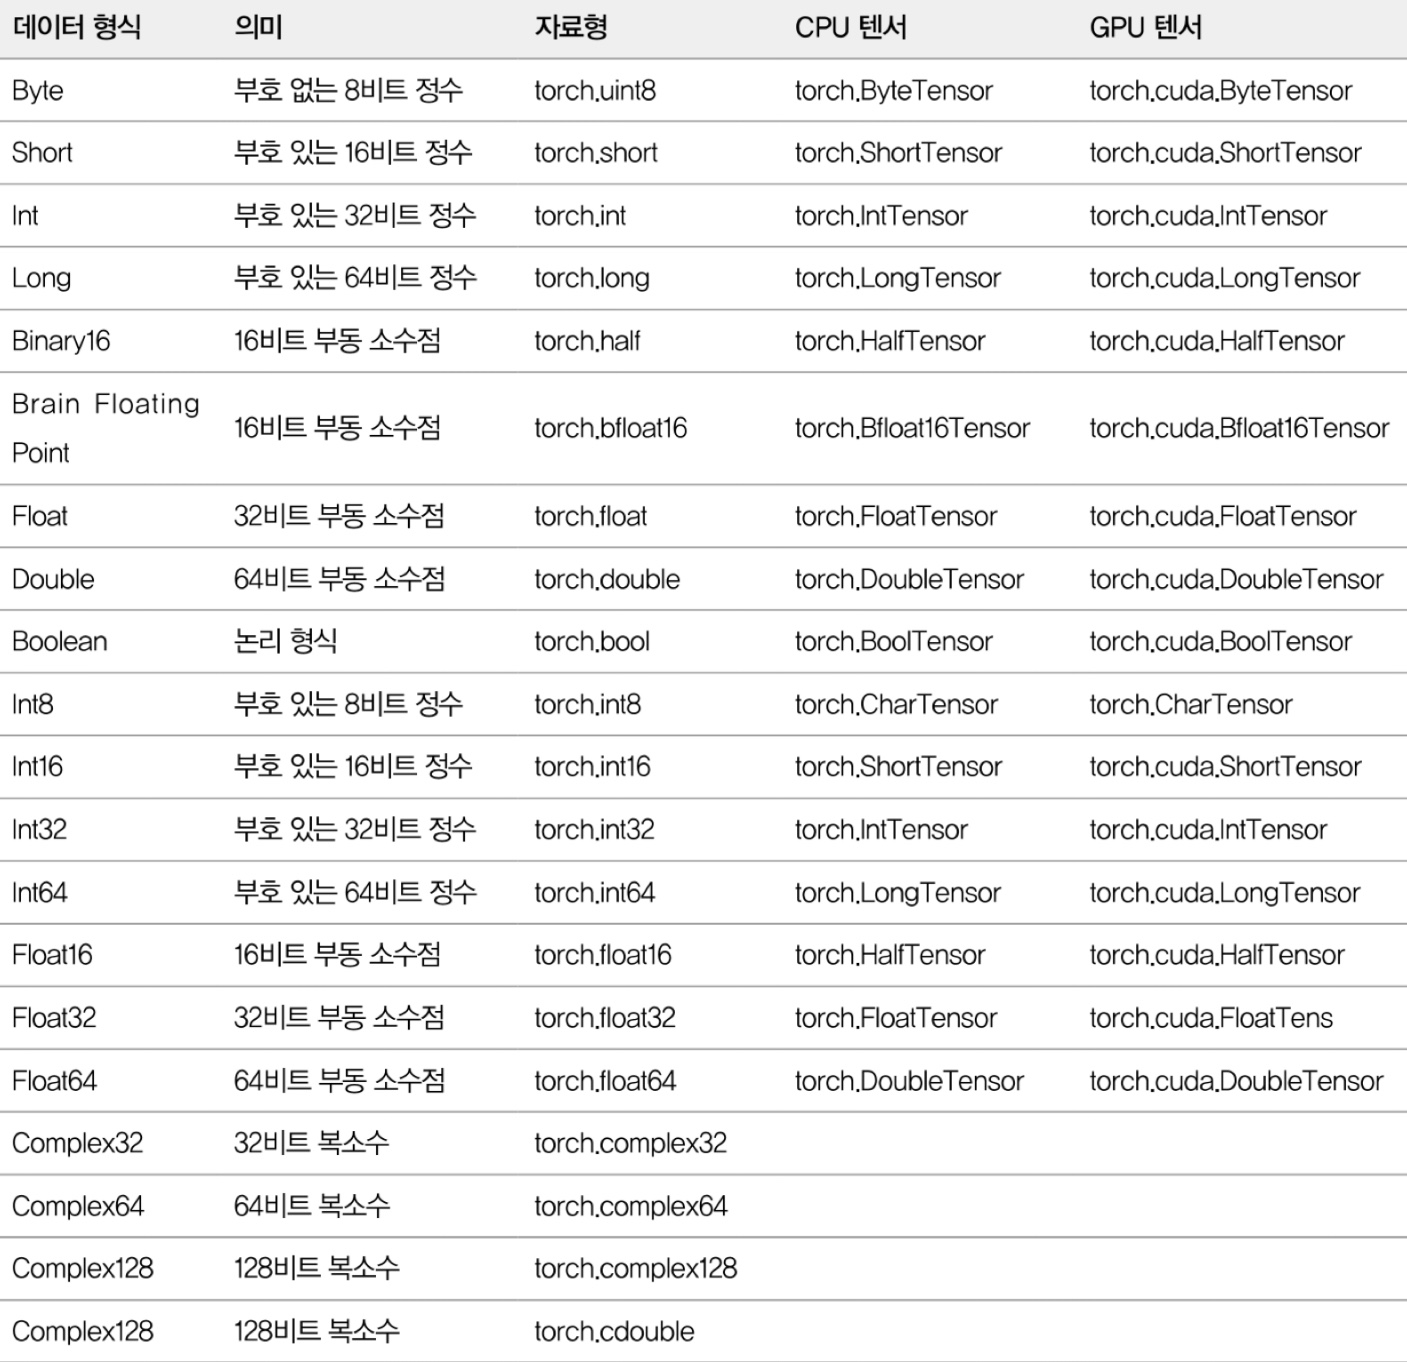

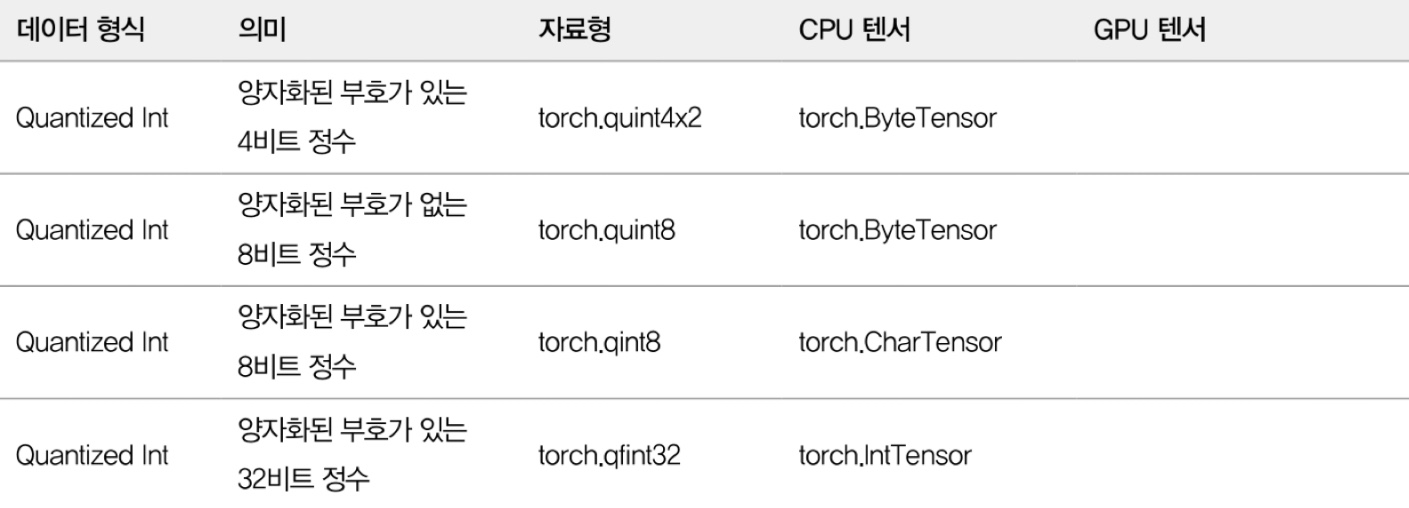